In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
#from sklearn.metrics import confusion_matrix, roc_curve, compare_lg_knn_svm(yt_knn,yp_knn,yt_lg,yp_lg,yt_svm,yp_svm)accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import (
    confusion_matrix,
   roc_curve,
    accuracy_score,
    f1_score,
    roc_auc_score,
    classification_report
)

# Now you can call your compare function if it's defined
#compare_lg_knn_svm(yt_knn, yp_knn, yt_lg, yp_lg, yt_svm, yp_svm)
from astropy.table import Table
from sklearn.metrics import roc_auc_score
#import shap



In [3]:
df = pd.read_csv('student-data.csv')
dfv = pd.read_csv('student-data.csv')

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [7]:
# mapping strings to numeric values:
def numerical_data():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col
# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [9]:
# All values in numerical after calling numerical_data() function
numerical_data()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,6,0
1,0,1,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,1,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,1,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,1,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,0,0,5,5,4,4,5,4,11,0
391,1,0,17,0,0,0,3,1,2,2,...,1,0,2,4,5,3,4,2,3,1
392,1,0,21,1,1,0,1,1,4,4,...,0,0,5,5,3,3,3,3,3,0
393,1,0,18,1,0,0,3,2,2,4,...,1,0,4,4,1,3,4,5,0,1


In [11]:
# Let's scal our features
feature_scaling(df)

# Now we are ready for models training
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.00,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.057215,1.0
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.50,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451,1.0
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.00,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,0.0,0.150173,0.0,0.0,1.0,0.50,0.50,0.50,0.50,...,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.070549,0.0
391,1.0,0.0,0.013809,0.0,0.0,0.0,0.75,0.25,0.50,0.50,...,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118,1.0
392,1.0,0.0,0.195627,1.0,1.0,0.0,0.25,0.25,1.00,1.00,...,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118,0.0
393,1.0,0.0,0.059264,1.0,0.0,0.0,0.75,0.50,0.50,1.00,...,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118,1.0


In [ ]:
df.shape

In [ ]:
df.dropna().shape # their is no null value "fortunately:)"

In [13]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [19]:
features=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

In [21]:
features=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

In [ ]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

In [ ]:
df["goout"].unique()

In [ ]:
# going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

In [23]:
def perc(column):
    return column / column.sum() * 100

In [ ]:
# romantic status
romance_tab1 = pd.crosstab(index=df.passed, columns=df.romantic)
romance_tab = np.log(romance_tab1.replace(0, np.nan))  # Replace 0 with NaN to avoid log(0) issues

# Apply the percentage function and reindex using the index of `romance_tab`
romance_perc = romance_tab.apply(perc).reindex(romance_tab.index)
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student status By Romantic relaion', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
# 0 in romantic mean no romantic relation 

In [ ]:
# 1) mother job 
# Mjob distribution
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=dfv, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)

In [ ]:
mjob_tab1 = pd.crosstab(index=df.passed, columns=df.Mjob)
mjob_tab = np.log(mjob_tab1.replace(0, np.nan))  # Replace 0 with NaN to avoid log(0) issues

# Apply the percentage function and reindex using the index of `mjob_tab`
mjob_perc = mjob_tab.apply(perc).reindex(mjob_tab.index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By mother JOB', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
#'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4

In [ ]:
#Mother education:
good = df.loc[df.passed==1]
poor=df.loc[df.passed==0]
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")#poor_student in blue
plt.xlabel('Mother Education Level', fontsize=20)

In [ ]:
higher_tab = pd.crosstab(index=df.passed, columns=df.higher)

# Apply the percentage function and reindex using the index of `higher_tab`
higher_perc = higher_tab.apply(perc).reindex(higher_tab.index)

higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


In [ ]:
#impact of age
higher_tab = pd.crosstab(index=df.passed, columns=df.age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status  By age', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
#impact of failures
fail_tab = pd.crosstab(index=df.passed, columns=df.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By failures', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
#first let's see the destribution of students who live in urban or rural area
f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=dfv, order=['U','R'])
fx = fx.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')

In [ ]:
ad_tab1 = pd.crosstab(index=df.passed, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('student status By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Student status', fontsize=16)

In [ ]:
#impact of weekend alcohol consumption in student performance
alc_tab = pd.crosstab(index=df.passed, columns=df.Walc)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By weekend alchol consumption', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
# weekend alcohol consumption
# create good student dataframe
good = df.loc[df.passed == 1]
good['good_alcohol_usage']=good.Walc
# create poor student dataframe
poor = df.loc[df.passed == 0]
poor['poor_alcohol_usage']=poor.Walc
plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

In [ ]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
stu_tab = pd.crosstab(index=df.passed, columns=df.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
he_tab = pd.crosstab(index=df.passed, columns=df.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

###Logistic Regression implementation

In [ ]:
# split data train 70 % and test 30 %

data = df.to_numpy()
n = data.shape[1]
x = data[:,0:n-1]
y = data[:,n-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Once our data is split, we can forget about x_test and y_test until we define our model.
#x_train and y_train are the samples we will use to train the model

In [27]:
# let's create a model and train it 

logisticRegr = LogisticRegression(C=1)


In [29]:
#and now let's do the training

logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1)

In [31]:
#The model is now trained and ready to make predictions :) 
y_pred=logisticRegr.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [33]:
#let's have a look at the accuracy of the model

Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('#Accuracy test is: ',Sctest)
print('#Accuracy train is: ',Sctrain)


f1 = f1_score(y_test, y_pred, average='macro')

print('\n#f1 score is: ',f1)

#Accuracy test is:  0.6386554621848739
#Accuracy train is:  0.7463768115942029

#f1 score is:  0.5533734834598935


In [35]:
#let's have a look at the accuracy of the model

Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('Accuracy test is: ',Sctest)
print('Accuracy train is: ',Sctrain)

Accuracy test is:  0.6386554621848739
Accuracy train is:  0.7463768115942029


In [37]:
#now, we can get the confusion matrix with confusion_matrix():

confusion_matrix(y_test, y_pred)

array([[12, 38],
       [ 5, 64]], dtype=int64)

<Axes: >

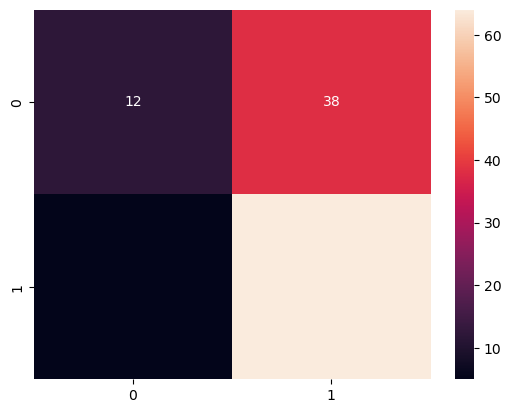

In [39]:
#let's visualize the confusion matrix:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [41]:
#import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.24      0.36        50
         1.0       0.63      0.93      0.75        69

    accuracy                           0.64       119
   macro avg       0.67      0.58      0.55       119
weighted avg       0.66      0.64      0.58       119



In [ ]:
#ploting the roc_curve

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()




*Accuracy is: 80.67226890756302
*f1 score is:  0.7408389357068459


 *the ROC curve: 


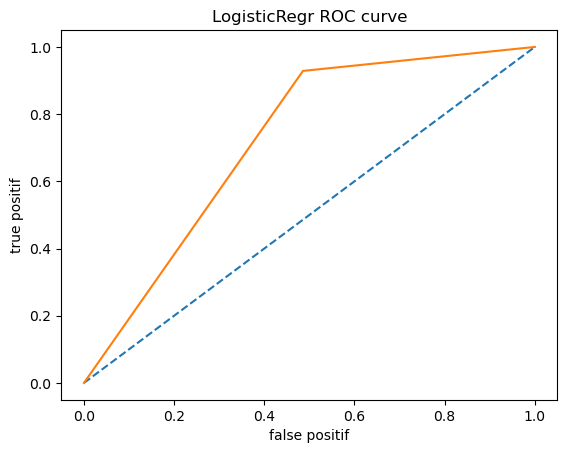

 *the confusion matrix 


<Axes: >

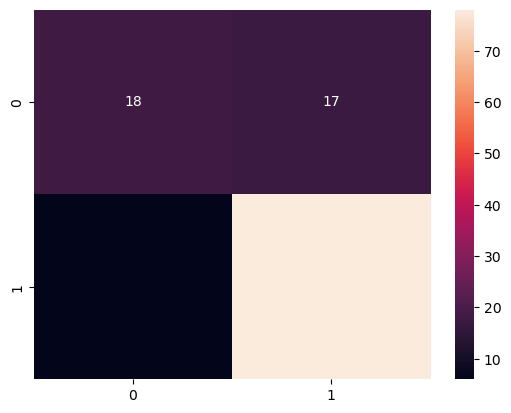

In [43]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
import random
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    logisticRegr = LogisticRegression(C=1)
    logisticRegr.fit(x_train,y_train)
    y_pred=logisticRegr.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
    
   
optimal_state = 85491961
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(x_train,y_train)
y_pred=logisticRegr.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

yt_lg,yp_lg = y_test,y_pred
#ploting the roc_curve

print ( '\n\n *the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()


#visualizig the confusion matrix:

print (' *the confusion matrix ')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
#define data
y=df.passed
target=["passed"]
x = df.drop(target,axis = 1 )

In [ ]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
    
optimal_state = 71027464

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

print ('random_state is ',optimal_state)


#ploting the roc_curve

print ( '\n\n *the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='knn')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('KNN ROC curve')
p=plt.show()

yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:

print (' *the confusion matrix ')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

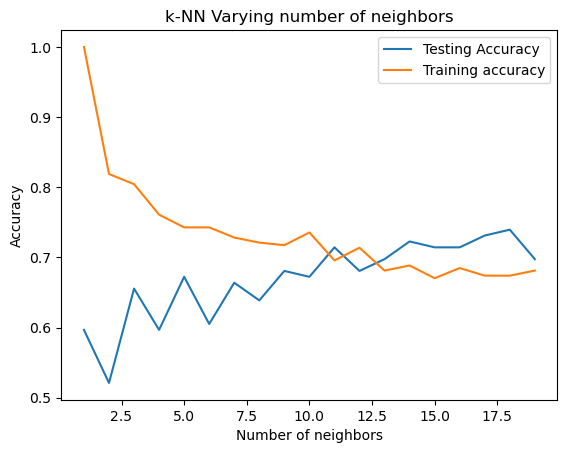

In [45]:
#Setup arrays to store training and test accuracies
neighbors= np.arange(1,20)
train_accuracy =np.empty(19)
test_accuracy = np.empty(19)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [48]:
#In case of classifier like knn the parameter to be tuned is n_neighbors 
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)
#best score\n",
knn_cv.best_score_

0.6631168831168831

In [49]:
knn_cv.best_params_

{'n_neighbors': 15}

In [50]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
#best score\n",
knn_cv.best_score_

0.6734177215189873

In [ ]:
knn_cv.best_params_

In [51]:
params = {"n_neighbors":[7,19] , "metric":["euclidean", "manhattan", "chebyshev"]}
acc = {}

for m in params["metric"]:
    acc[m] = []
    for k in params["n_neighbors"]:
        print("Model_{} metric: {}, n_neighbors: {}".format(i, m, k))
        i += 1
        t = time()
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(x_train,y_train)
        pred = knn.predict(x_test)
        print("Time: ", time() - t)
        acc[m].append(accuracy_score(y_test, y_pred))
        print("Acc: ", acc[m][-1])

Model_18 metric: euclidean, n_neighbors: 7
Time:  0.06412887573242188
Acc:  0.8067226890756303
Model_19 metric: euclidean, n_neighbors: 19
Time:  0.08428215980529785
Acc:  0.8067226890756303
Model_20 metric: manhattan, n_neighbors: 7
Time:  0.09998750686645508
Acc:  0.8067226890756303
Model_21 metric: manhattan, n_neighbors: 19
Time:  0.052742958068847656
Acc:  0.8067226890756303
Model_22 metric: chebyshev, n_neighbors: 7
Time:  0.08503580093383789
Acc:  0.8067226890756303
Model_23 metric: chebyshev, n_neighbors: 19
Time:  0.06508898735046387
Acc:  0.8067226890756303


In [54]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
f1 = 0
accuracy = 0
True60 = False
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    KNN = KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if accuracy>maxAccuracy and f1>=0.5:
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
        if maxAccuracy>79:
            break
    
optimal_state = 29300362         
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
KNN_f= KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
KNN_f.fit(x_train,y_train)
y_pred=KNN_f.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

print ('random_state is ',optimal_state)
yt_knn,yp_knn= y_test,y_pred




*Accuracy is: 78.15126050420169
*f1 score is:  0.4386792452830189
random_state is  29300362


Accuracy is:  0.7815126050420168


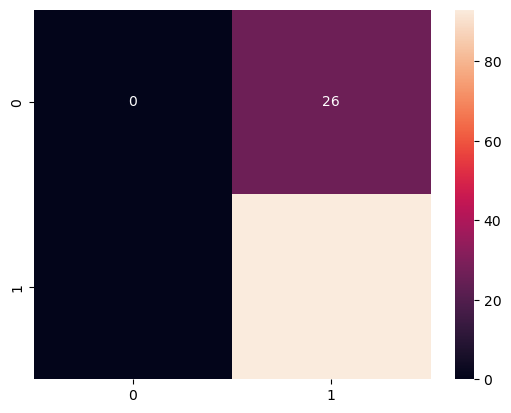

In [58]:
ac = accuracy_score(yt_knn,yp_knn)
print('Accuracy is: ',ac)
cm= confusion_matrix(yt_knn,yp_knn)
sns.heatmap(cm,annot=True)
yt_knn,yp_knn = y_test,y_pred

In [ ]:
print(classification_report(y_test,y_pred))

 the ROC curve: 


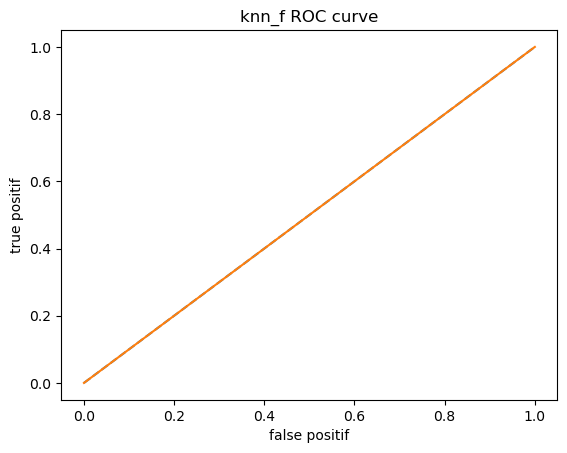

In [60]:
#ploting the roc_curve

print ( ' the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='final knn model')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('knn_f ROC curve')
p=plt.show()

In [62]:
# Mohammed AL JADD


# ------------------------------------------------------------------------------------------------------------------------------
# Show results of every model

def showResults(accuracy, trainingTime, y_pred,model):
    
    print('------------------------------------------------Results :',model,'-------------------------------------------------')
    confusionMatrix = confusion_matrix(y_test, y_pred)
    print('\n The ROC curve is :\n')
    fig, _ = plt.subplots()
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label=model)
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    plt.legend()
    fig.suptitle('ROC curve: '+str(model))
    plt.show()
    
    print('----------------------------------------------')
    print('The model  accuracy:', round(accuracy),'%')
    print('----------------------------------------------')
    print('The training time is: ',trainingTime)
    print('----------------------------------------------')
    print('The f1 score is :',round(100*f1_score(y_test, y_pred, average='macro'))/100)
    print('----------------------------------------------')
    print('The roc_auc_score is :',round(100*roc_auc_score(y_test, y_pred))/100)
    print('----------------------------------------------')
    print('The confusion matrix is :\n')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)


    
# ------------------------------------------------------------------------------------------------------------------------------
# Hyperparameter Tuning :
# C, degree and gamma are the parameters that are used in SVM classffier 'svc(C=..,..),svc(C,degree=..)',svc(C,gamma=..)
# The following functions will return those values that minimize the error on (X_val,y_val) set
# So this (X_val,y_val) set will be used to get the optimal SVM parameters before evaluating the model on the test set


# Optimal C 
def optimal_C_value():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    minError = float('Inf')
    optimal_C = float('Inf')

    for c in Ci:
        clf = SVC(C=c,kernel='linear')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        error = np.mean(np.double(predictions != y_val))
        if error < minError:
            minError = error
            optimal_C = c
    return optimal_C


# Optimal C and the degree of the polynomial
def optimal_C_d_values():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    Di = np.array(( 2, 5, 10, 15, 20, 25, 30))
    minError = float('Inf')
    optimal_C = float('Inf')
    optimal_d = float('Inf')

    for d in Di:
        for c in Ci:
            clf = SVC(C=c,kernel='poly', degree=d)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_val)
            error = np.mean(np.double(predictions != y_val))
            if error < minError:
                minError = error
                optimal_C = c
                optimal_d = d
    return optimal_C,optimal_d


# Optimal C and gamma
def optimal_C_gamma_values():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    Gi = np.array(( 0.000001,0.00001,0.01,1,2,3,5,20,70,100,500,1000))
    minError = float('Inf')
    optimal_C = float('Inf')
    optimal_g = float('Inf')

    for g in Gi:
        for c in Ci:
            clf = SVC(C=c,kernel='rbf', gamma=g)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_val)
            error = np.mean(np.double(predictions != y_val))
            if error < minError:
                minError = error
                optimal_C = c
                optimal_g = g
    return optimal_C,optimal_g


# ------------------------------------------------------------------------------------------------------------------------------
# Compare the three kernels


def compare_kernels():
    X_train1,X_val1,X_test1,y_train1,y_val1,y_test1 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
    X_train2,X_val2,X_test2,y_train2,y_val2,y_test2 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state2)
    X_train3,X_val3,X_test3,y_train3,y_val3,y_test3 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state3)
    print('------------------------------------------------ Comparison -----------------------------------------------------')
    print('\n')
    f11 = "{:.2f}".format(f1_score(y_test1, y_linear, average='macro'))
    f22 = "{:.2f}".format(f1_score(y_test2, y_poly, average='macro'))
    f33 = "{:.2f}".format(f1_score(y_test3, y_gauss, average='macro'))
    roc1 = "{:.2f}".format(roc_auc_score(y_test1, y_linear))
    roc2 = "{:.2f}".format(roc_auc_score(y_test2, y_poly))
    roc3 = "{:.2f}".format(roc_auc_score(y_test3, y_gauss))
    a1,a2 = confusion_matrix(y_test1, y_linear)[0],confusion_matrix(y_test1, y_linear)[1]
    b1,b2 = confusion_matrix(y_test2, y_poly)[0],confusion_matrix(y_test2, y_poly)[1]
    c1,c2 = confusion_matrix(y_test3, y_gauss)[0],confusion_matrix(y_test3, y_gauss)[1]
    data_rows = [('training time',time1, time2, time3),
                 ('','','',''),
                  ('accuracy %',linear_accuracy, poly_accuracy, gauss_accuracy),
                 ('','','',''),
                 ('confusion matrix',a1, b1, c1),
                ('',a2,b2,c2),
                 ('','','',''),
                ('f1 score',f11,f22,f33),
                 ('','','',''),
                ('roc_auc_score',roc1,roc2,roc3)]
    t = Table(rows=data_rows, names=('metric','Linear kernel', 'polynomial kernel', 'gaussian kernel'))
    print(t)
    print('\n\n')
    print('The Roc curves :\n')
    y_pred1 = y_linear
    y_pred2 = y_poly
    y_pred3 = y_gauss
    fig, _ = plt.subplots()
    fig.suptitle('Comparison of three ROC curves')
    fpr,tpr,thresholds=roc_curve(y_test1,y_pred1)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label='Linear kernel :'+str(roc1))
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    fpr,tpr,thresholds=roc_curve(y_test2,y_pred2)
    plt.plot(fpr,tpr,label='Polynomial kernel :'+str(roc2))
    fpr,tpr,thresholds=roc_curve(y_test3,y_pred3)
    plt.plot(fpr,tpr,label='Gaussian kernel :'+str(roc3))
    plt.legend()
    plt.show()
    

# ------------------------------------------------------------------------------------------------------------------------------
# Print results of the choosen kernel

def best_kernel(kernel):
    X_train1,X_val1,X_test1,y_train1,y_val1,y_test1 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
    X_train2,X_val2,X_test2,y_train2,y_val2,y_test2 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state2)
    X_train3,X_val3,X_test3,y_train3,y_val3,y_test3 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state3)
    
    time = 0
    f1 = 0
    accuracy = 0
    rc = 0
    y = 0
    if kernel == 'linear kernel':
        time = time1
        f1 = "{:.2f}".format(f1_score(y_test1, y_linear, average='macro'))
        accuracy = round(100*linear_accuracy)/100
        rc = round(100*roc_auc_score(y_test1, y_linear))/100
        y_test = y_test1
        y = y_linear
    elif kernel == 'polynomial kernel':
        time = time2
        f1 = "{:.2f}".format(f1_score(y_test2, y_poly, average='macro'))
        accuracy = round(100*poly_accuracy)/100
        rc = round(100*roc_auc_score(y_test2, y_poly))/100
        y_test = y_test2
        y = y_poly
    else :
        time = time3
        f1 = "{:.2f}".format(f1_score(y_test3, y_gauss, average='macro'))
        accuracy = round(100*gauss_accuracy)/100
        rc = round(100*roc_auc_score(y_test3, y_gauss))/100
        y_test = y_test3
        y = y_gauss 
        
    # used for comparing three classfiers(knn, logistic regression and svm)
    yt_svm,yp_svm = y_test, y
    
    print('The choosen kernel :',kernel)
    print('the training :',time)
    print('the accuracy :',round(accuracy),'%')
    print('the f1 score :',f1)
    print('The roc_auc_score is :',rc)
    print('----------------------------------------\nThe ROC curve :')
    fig, _ = plt.subplots()
    fpr,tpr,thresholds=roc_curve(y_test,y)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label=kernel+': '+str(rc))
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    plt.legend()
    plt.show()
    confusionMatrix = confusion_matrix(y_test, y)
    print('----------------------------------------\nThe confusion matrix is  :')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)
    ax.set_title('Confusion matrix of SVM '+str(kernel))
    return yt_svm,yp_svm
    
# ------------------------------------------------------------------------------------------------------------------------------
# svm factor : factor affecting students performance, later on on this Ipython notebook  we will explain how we will do this


# 1) factor as svm coefficients
def factors(array, K, max_or_min, df):
    
    n = array.shape[1]
    array = array.reshape(n,1)
    my_list = array.tolist()
    
    if max_or_min == 'max':
        temp = sorted(my_list)[-K:]
        res = [] 
        for ele in temp: 
            res.append(my_list.index(ele))
        return(get_factors(res, df))
    
    
    elif max_or_min == 'min':
        temp = sorted(my_list, reverse=True)[-K:]
        temp = temp = np.array(temp).reshape(K,1)
        res = []
        for ele in temp:
            if ele<0:
                res.append(my_list.index(ele))
        return(get_factors(res, df))
    

    else:
        return
    

# 2) converts those factors to dataset columns name
def get_factors(index, df):
    f = []
    for i in index:
        f.append(df.columns[i])
    return f
    

# 3) Convert column names to understandable string
 
columns_name = {'famsize': 'family size', 'Pstatus': "parent's cohabitation status ", 'Medu': "mother's education",
                'Fedu': "father's education", 'Mjob': "mother's job", 'Fjob': "father's job", 
                'reason': 'reason to choose this school ','schoolsup': 'extra educational support', 'famsup': 'family educational support',
                'paid': 'extra paid classes within the course subject', 'higher': 'wants to take higher education',
                'romantic': 'with a romantic relationship ', 'famrel': 'quality of family relationships', 'goout': 'going out with friends',
                'Dalc': 'workday alcohol consumption', 'Walc': 'weekend alcohol consumption'}        


def column_to_string(fcts,max_or_min):
    
    if max_or_min == 'max':
        print('-----------------------------------------------------------------------------------')
        print('Factors helping students succeed :')
    else:
        print('-----------------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------------')
        print('Factors leading students to failure')
        
    for fct in fcts:
        if fct in columns_name:
            print(columns_name[fct])
        else:
            print(fct)
    
    
# ------------------------------------------------------------------------------------------------------------------------------
# Splitting the data for SVM
# Here We will split data into test set, cross validation (X_val, y_val) set and training set
# The cross validation (X_val, y_val) is used for choosing the optimal value for svm parameters C, degree and gamma

def split(df,rest_size,test_size,randomState):
    data = df.to_numpy()
    n = data.shape[1]
    x = data[:,0:n-1]
    y = data[:,n-1]
    if(randomState):
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=randomState)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=randomState)
    else:
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=0)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=0)
    
    return X_train,X_val,X_test,y_train,y_val,y_test
# We will use the three different svm classifier kernels
# Linear kernel, polynomial kernel and gaussian kernel and we will choose the most accurate

------------------------------------------------Results : SVM linear kernel -------------------------------------------------

 The ROC curve is :



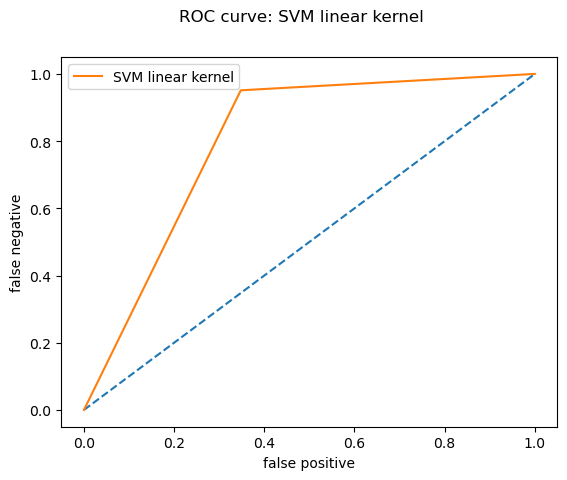

----------------------------------------------
The model  accuracy: 84 %
----------------------------------------------
The training time is:  16ms
----------------------------------------------
The f1 score is : 0.82
----------------------------------------------
The roc_auc_score is : 0.8
----------------------------------------------
The confusion matrix is :



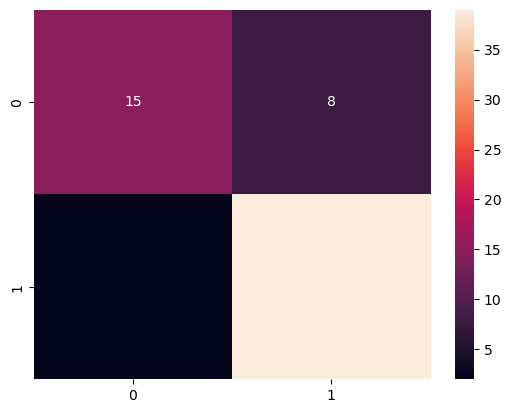

In [64]:
################################################### Linear kernel ###########################################################
optimal_split_state1 = 0
maxAccuracy = 0
maxF1 = 0

# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 2000 for example 
# and remove the line 'optimal_split_state = 388628375' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')

for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+' Current f1 '+str(maxF1), end="\r")
    # Let's get the optimal C value for the linear kernal
    split_state = np.random.randint(1,1000000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)
    optimal_C = optimal_C_value()


    # Now let's use the optimal C value
    linear_clf = SVC(C=optimal_C,kernel='linear')

    # Let's train the model with the optimal C value and calculate the training time
    tic = time()
    linear_clf.fit(X_train, y_train)
    toc = time()
    time1 = str(round(1000*(toc-tic))) + "ms"
    y_linear = linear_clf.predict(X_test)
    linear_f1 = f1_score(y_test, y_linear, average='macro')
    linear_accuracy = accuracy_score(y_test, y_linear)*100
    if linear_accuracy>maxAccuracy and linear_f1>maxF1:
        maxAccuracy = linear_accuracy
        maxF1 = linear_f1
        optimal_split_state1 = split_state
    if maxAccuracy>86 and maxF1>80:
        break;
        
# We've already tuned our hyperparameters, we will not repeat that again as it takes soo long. 
# The optimal split state for linear kernel is 388628375
# Let's try that split state 
optimal_split_state1 = 388628375
X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
optimal_C = optimal_C_value()


# Now let's use the optimal C value
linear_clf = SVC(C=optimal_C,kernel='linear')

# Let's train the model with the optimal C value and calculate the training time
tic = time()
linear_clf.fit(X_train, y_train)
toc = time()
time1 = str(round(1000*(toc-tic))) + "ms"
y_linear = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_linear)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(linear_accuracy, time1, y_linear,'SVM linear kernel')

In [ ]:
###################################################### Polynomial kernel #######################################################
optimal_split_state2 = 0
maxAccuracy = 0
maxF1 = 0


# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 500 for example 
# and remove the line 'optimal_split_state2 = 7070621' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+', Current f1 '+str(maxF1), end="\r")
    
    split_state = np.random.randint(1,100000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)

    # Let's get the optimal C and the degree value for the polynomial kernal
    optimal_C, optimal_d = optimal_C_d_values()
    
    # Now let's use the optimal c value and the optimal degree value
    poly_clf = SVC(C=optimal_C,kernel='poly', degree=optimal_d)

    # Let's train the model with the optimal C value 
    poly_clf.fit(X_train, y_train)
    y_poly = poly_clf.predict(X_test)
    poly_f1 = f1_score(y_test, y_poly, average='macro')
    poly_accuracy = accuracy_score(y_test, y_poly)*100
    
    if poly_accuracy>maxAccuracy and poly_f1>maxF1:
        maxAccuracy = poly_accuracy
        maxF1 = poly_f1
        optimal_split_state2 = split_state

# We've already tuned our hyperparameters, we will not repeat that again as it takes soo long. 
# The optimal split state for polynomial kernel is 7070621
# Let's try that split state 
optimal_split_state2 = 7070621

X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state2)

optimal_C, optimal_d = optimal_C_d_values()


# Now let's use the optimal C value
poly_clf = SVC(C=optimal_C,kernel='poly', degree=optimal_d)

# Let's train the model and calculate the training time
tic = time()
poly_clf.fit(X_train, y_train)
toc = time()
time2 = str(round(1000*(toc-tic))) + "ms"
y_poly = poly_clf.predict(X_test)
poly_accuracy = accuracy_score(y_test, y_poly)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(poly_accuracy, time2, y_poly,'SVM polynomial kernel')

------------------------------------------------Results : SVM gaussian kernel -------------------------------------------------

 The ROC curve is :



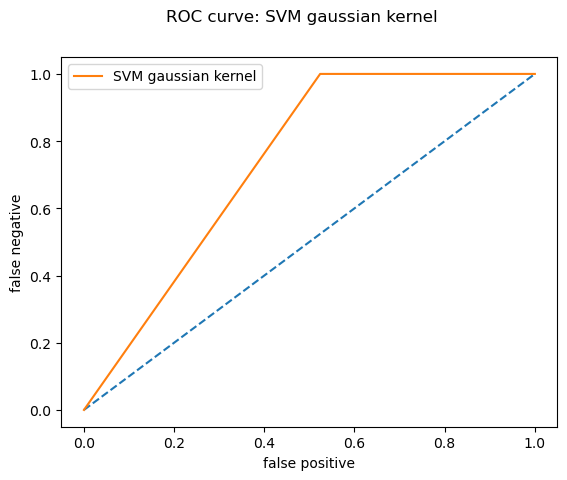

----------------------------------------------
The model  accuracy: 83 %
----------------------------------------------
The training time is:  16ms
----------------------------------------------
The f1 score is : 0.77
----------------------------------------------
The roc_auc_score is : 0.74
----------------------------------------------
The confusion matrix is :



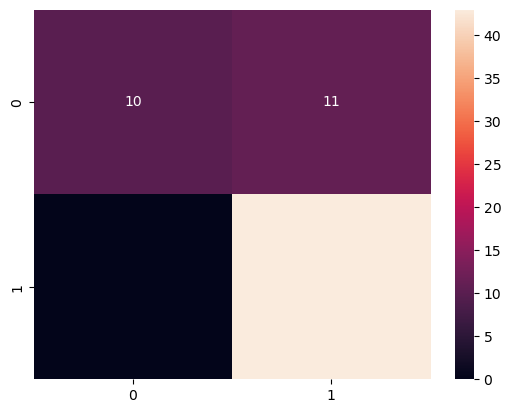

In [66]:
###################################################### Gaussian kernel ######################################################
optimal_split_state3 = 0
maxAccuracy = 0
maxF1 = 0


# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 500 for example 
# and remove the line 'optimal_split_state3 = 93895097' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------------Hyperparameters tunning starts'\
          '--------------------------------------------\n\n')
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+', Current f1 '+str(maxF1), end="\r")
    
    split_state = np.random.randint(1,100000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)

    # Let's get the optimal C and the degree value for the polynomial kernal
    optimal_C, optimal_gamma = optimal_C_gamma_values()
    
    # Now let's use the optimal c value and the optimal degree value
    gauss_clf = SVC(C=optimal_C,kernel='rbf',gamma=optimal_gamma)

    # Let's train the model with the optimal C value 
    gauss_clf.fit(X_train, y_train)
    y_gauss = gauss_clf.predict(X_test)
    gauss_f1 = f1_score(y_test, y_gauss, average='macro')
    gauss_accuracy = accuracy_score(y_test, y_gauss)*100
    
    if gauss_accuracy>maxAccuracy and gauss_f1>maxF1:
        maxAccuracy = gauss_accuracy
        maxF1 = gauss_f1
        optimal_split_state3 = split_state

# We've already tuned our hyperparameters, we will not repeat that again as it takes soo long. 
# The optimal split state for polynomial kernel is 93895097
# Let's try that split state 
optimal_split_state3 = 93895097

X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state3)

optimal_C, optimal_gamma = optimal_C_gamma_values()


# Now let's use the optimal C value
gauss_clf = SVC(C=optimal_C,kernel='rbf',gamma=optimal_gamma)

# Let's train the model and calculate the training time
tic = time()
gauss_clf.fit(X_train, y_train)
toc = time()
time3 = str(round(1000*(toc-tic))) + "ms"
y_gauss = gauss_clf.predict(X_test)
gauss_accuracy = (accuracy_score(y_test, y_gauss)*100)

if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')
                                                                
# Let's show the resuls
showResults(gauss_accuracy, time3, y_gauss,'SVM gaussian kernel')

In [68]:
compare_kernels()

NameError: name 'optimal_split_state2' is not defined

In [70]:
yt_svm,yp_svm = best_kernel('linear kernel')

NameError: name 'optimal_split_state2' is not defined

In [72]:
# Get svm parameters
coefs = linear_clf.coef_

# factors helping students to succeed
column_to_string(factors(coefs, 5, 'max', df),'max')

# factors leading students to failure
column_to_string(factors(coefs, 5, 'min', df), 'min')

-----------------------------------------------------------------------------------
Factors helping students succeed :
father's education
guardian
wants to take higher education
studytime
father's job
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Factors leading students to failure
age
health
going out with friends
absences
failures


In [74]:
# Function to compare the three classifiers (Logistic regression, KNN and SVM) performances :

def compare_lg_knn_svm(yt_knn,yp_knn,yt_lg,yp_lg,yt_svm,yp_svm):
    #F1 score
    f1_lg = round(f1_score(yt_lg, yp_lg, average='macro')*100)
    f1_knn = round(f1_score(yt_knn, yp_knn, average='macro')*100)
    f1_svm = round(f1_score(yt_svm, yp_svm, average='macro')*100)
    
    #Accuracy score
    acc_lg = round(accuracy_score(yt_lg, yp_lg)*100)
    acc_knn = round(accuracy_score(yt_knn, yp_knn)*100)
    acc_svm = round(accuracy_score(yt_svm, yp_svm)*100)
    
    #Confusion matrix
    conf_lg = confusion_matrix(yt_lg, yp_lg)
    conf_knn = confusion_matrix(yt_knn, yp_knn)
    conf_svm = confusion_matrix(yt_svm, yp_svm)
    
    #ROC score
    roc_c_lg = round(roc_auc_score(yt_lg, yp_lg)*100)
    roc_c_knn = round(roc_auc_score(yt_knn, yp_knn)*100)
    roc_c_svm = round(roc_auc_score(yt_svm, yp_svm)*100)
    
    #ROC curve thresholds
    roc_knn = roc_curve(yt_knn,yp_knn)
    roc_lg = roc_curve(yt_lg,yp_lg)
    roc_svm = roc_curve(yt_svm,yp_svm)
    
    # Table of metrics
    print('-----------------------------Table of metrics--------------------------------------\n\n')
    data_rows = [('f1 score',f1_lg,f1_knn,f1_svm),
                 ('','','',''),
                  ('accuracy %',acc_lg,acc_knn,acc_svm),
                 ('','','',''),
                 ('confusion matrix',conf_lg[0], conf_knn[0], conf_svm[0]),
                ('',conf_lg[1], conf_knn[1], conf_svm[1]),
                 ('','','',''),
                ('ROC score',roc_c_lg,roc_c_knn,roc_c_svm)]
    t = Table(rows=data_rows, names=('metric','Logistic regression', 'KNN', 'SVM'))
    print(t)
    
    #Plot ROC curve
    print('\n\n-----------------------------ROC curves--------------------------------------\n\n')
    fig, _ = plt.subplots()
    fig.suptitle('Comparison of three ROC curves')
    fpr,tpr,thresholds=roc_lg
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label='Logistic regression :'+str(roc_c_lg))
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    fpr,tpr,thresholds=roc_knn
    plt.plot(fpr,tpr,label='KNN :'+str(roc_c_knn))
    fpr,tpr,thresholds=roc_svm
    plt.plot(fpr,tpr,label='SVM :'+str(roc_c_svm))
    plt.legend()
    plt.show()
    
    
    # Maximum metrics
    print('-----------------------------Max of metrics--------------------------------------\n\n')
    data_rows = [('max f1 score',algo_with_max_metric(f1_lg,f1_knn,f1_svm)),
                 ('','','',''),
                  ('max accuracy %',algo_with_max_metric(acc_lg,acc_knn,acc_svm)),
                 ('','','',''),
                ('max ROC score',algo_with_max_metric(roc_c_lg,roc_c_knn,roc_c_svm))]
    t = Table(rows=data_rows, names=('metric','Learning algorithm winnig'))
    print(t)
    
# Function returning name of winnig algorithm based on a single metric
def algo_with_max_metric(a,b,c):
    max_metric = max(a,b,c)
    if max_metric == a:
        return 'Logistic regression'
    elif max_metric == b:
        return 'KNN'
    else:
        return 'SVM'

In [76]:
compare_lg_knn_svm(yt_knn,yp_knn,yt_lg,yp_lg,yt_svm,yp_svm)

NameError: name 'yt_svm' is not defined

In [103]:


# List all features the model was originally trained on (30 features as expected by logisticRegr)
feature_names = [
    'age', 'studytime', 'failures', 'famrel', 'absences',
    # Add placeholders for additional features required by the model
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health'
]

# Define the get_user_input function
def get_user_input():
    user_data = {}
    # Request input only for the essential features
    essential_features = ['age', 'studytime', 'failures', 'famrel', 'absences']
    for feature in essential_features:
        user_data[feature] = [float(input(f"Enter value for {feature}: "))]

    # Convert input to a DataFrame
    user_input_df = pd.DataFrame(user_data)

    # Ensure all required columns are present, filling missing ones with 0
    return user_input_df.reindex(columns=feature_names, fill_value=0)

# Example usage
user_input_df = get_user_input()  # Get user input with all necessary features

# Predict the result using the trained model
user_prediction = logisticRegr.predict(user_input_df)

# Output the prediction
if user_prediction == 1:
    print("The student is predicted to pass.")
else:
    print("The student is predicted to fail.")


Enter value for age:  17
Enter value for studytime:  10
Enter value for failures:  1
Enter value for famrel:  1
Enter value for absences:  1


The student is predicted to fail.


C:\Users\anuvi\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [111]:
# Essential features you want to get from the user
essential_features = ['age', 'studytime', 'failures', 'famrel', 'absences']

# Define the get_user_input function to collect user data
def get_user_input():
    user_data = {}
    
    # Request input for essential features
    for feature in essential_features:
        user_data[feature] = [float(input(f"Enter value for {feature}: "))]
    
    # Create DataFrame for user input and reindex with all feature names
    user_input_df = pd.DataFrame(user_data)
    
    # Ensure all required columns are present, fill missing ones with 0
    user_input_df = user_input_df.reindex(columns=feature_names, fill_value=0)
    
    # Scale features as was done during training
    for col in user_input_df.columns:
        user_input_df[col] = (user_input_df[col] - X[col].min()) / (X[col].max() - X[col].min())
    
    return user_input_df

# Example usage
user_input_df = get_user_input()  # Get user input with all necessary features

# Predict the result using the best model (replace best_model with the appropriate model variable)
user_prediction = svc.predict(user_input_df)

# Output the prediction
if user_prediction[0] == 1:
    print("The student is predicted to pass.")
else:
    print("The student is predicted to fail.")


Enter value for age:  18
Enter value for studytime:  1
Enter value for failures:  1
Enter value for famrel:  1
Enter value for absences:  1


NameError: name 'svc' is not defined

In [115]:


# List all features the model was originally trained on (30 features as expected by logisticRegr)
feature_names = [
    'age', 'studytime', 'failures', 'famrel', 'absences',
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health'
]

# Define the get_user_input function to collect input for all features
def get_user_input():
    user_data = {}
    for feature in feature_names:
        # Prompt the user for each feature and handle input based on the data type expected by the model
        user_data[feature] = [input(f"Enter value for {feature}: ")]
    
    # Convert input data to a DataFrame and reindex to ensure all features are present
    user_input_df = pd.DataFrame(user_data)
    return user_input_df

# Example usage
user_input_df = get_user_input()  # Get user input for all features

# Convert DataFrame to NumPy array to avoid feature name warning if the model expects an array
user_input_array = user_input_df.to_numpy()

# Predict the result using the trained model (e.g., logistic regression)
user_prediction = logisticRegr.predict(user_input_array)

# Output the prediction
if user_prediction == 1:
    print("The student is predicted to pass.")
else:
    print("The student is predicted to fail.")


Enter value for age:  18
Enter value for studytime:  10
Enter value for failures:  0
Enter value for famrel:  5
Enter value for absences:  0
Enter value for school:  0
Enter value for sex:  0
Enter value for address:  0
Enter value for famsize:  0
Enter value for Pstatus:  0
Enter value for Medu:  0
Enter value for Fedu:  0
Enter value for Mjob:  0
Enter value for Fjob:  0
Enter value for reason:  0
Enter value for guardian:  0
Enter value for traveltime:  0
Enter value for schoolsup:  0
Enter value for famsup:  0
Enter value for paid:  0
Enter value for activities:  0
Enter value for nursery:  0
Enter value for higher:  0
Enter value for internet:  0
Enter value for romantic:  0
Enter value for freetime:  0
Enter value for goout:  0
Enter value for Dalc:  0
Enter value for Walc:  0
Enter value for health:  4


The student is predicted to fail.


In [87]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [85]:
user_input_df = user_input_df.apply(pd.to_numeric, errors='coerce').fillna(0)


In [89]:
import shap

# Create the SHAP explainer based on your trained model
explainer = shap.LinearExplainer(logisticRegr, X_train)

# Calculate SHAP values for the user input
shap_values = explainer.shap_values(user_input_df)

# Visualize the SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, user_input_df)


In [91]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer without using .values
explainer = LimeTabularExplainer(
    X_train, 
    feature_names=feature_names, 
    class_names=['Fail', 'Pass'], 
    mode='classification'
)

# Generate explanations for the user input
exp = explainer.explain_instance(user_input_df.values[0], logisticRegr.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True)


In [93]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logisticRegr.coef_[0]
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)


       Feature  Coefficient
13        Fjob     0.571978
17   schoolsup     0.451243
24    romantic     0.393300
6          sex     0.386599
20  activities     0.285673
23    internet     0.266063
21     nursery     0.187424
8      famsize     0.124420
7      address     0.091841
5       school     0.058064
10        Medu     0.052422
11        Fedu     0.049890
26       goout     0.025534
27        Dalc    -0.017616
3       famrel    -0.062798
18      famsup    -0.090068
9      Pstatus    -0.090765
12        Mjob    -0.127078
4     absences    -0.138092
19        paid    -0.152852
0          age    -0.256774
22      higher    -0.297597
28        Walc    -0.300840
1    studytime    -0.434369
16  traveltime    -0.473632
15    guardian    -0.505887
29      health    -0.673898
2     failures    -0.736322
25    freetime    -1.170846
14      reason    -1.562248


# deaplearnig model (Multi-Layer Perceptron (MLP))

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
# Assuming 'df' is your DataFrame and 'passed' is the target column
# Replace 'passed' with your actual target column name if different

# Separate features and target
X = df.drop(columns=['passed'])  # Replace 'passed' with your target column
y = df['passed']

# Encode categorical variables
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# If the target variable has more than two classes, use to_categorical
num_classes = len(np.unique(y))
if num_classes > 2:
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
if num_classes > 2:
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class
    loss_function = 'categorical_crossentropy'
else:
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    loss_function = 'binary_crossentropy'

# Compile the model
model.compile(
    loss=loss_function,
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy on test data: {scores[1]*100:.2f}%")

# Make predictions
y_pred_probs = model.predict(X_test)
if num_classes > 2:
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
else:
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()
    y_true = y_test

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Neural Network Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Epoch 1/50


C:\Users\anuvi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6296 - loss: 0.6828 - val_accuracy: 0.6203 - val_loss: 0.6545
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6801 - loss: 0.6151 - val_accuracy: 0.6329 - val_loss: 0.6410
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7099 - loss: 0.5807 - val_accuracy: 0.6203 - val_loss: 0.6343
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7417 - loss: 0.5430 - val_accuracy: 0.6076 - val_loss: 0.6290
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7347 - loss: 0.5487 - val_accuracy: 0.6203 - val_loss: 0.6265
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7369 - loss: 0.5356 - val_accuracy: 0.6076 - val_loss: 0.6253
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7521 - loss: 0.5133 - val_accuracy: 0.6329 - val_loss: 0.6258
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7717 - loss: 0.5055 - val_accuracy: 0.6203 - val_loss: 0.6326


# deaplearnig model  feed-forward neural network

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 64 neurons
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Neural Network Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Epoch 1/50


C:\Users\anuvi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5427 - loss: 0.7038 - val_accuracy: 0.5938 - val_loss: 0.6790
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5789 - loss: 0.6831 - val_accuracy: 0.6406 - val_loss: 0.6658
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5878 - loss: 0.6909 - val_accuracy: 0.6406 - val_loss: 0.6612
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5927 - loss: 0.6750 - val_accuracy: 0.6406 - val_loss: 0.6593
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6330 - loss: 0.6409 - val_accuracy: 0.6406 - val_loss: 0.6575
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7275 - loss: 0.6110 - val_accuracy: 0.6406 - val_loss: 0.6554
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6348 - loss: 0.6454 - val_accuracy: 0.6406 - val_loss: 0.6525
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6561 - loss: 0.6679 - val_accuracy: 0.6406 - val_loss: 0.6488
Epoch 9/50
8/8 

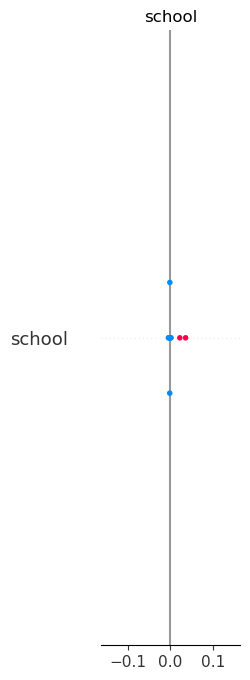

In [99]:
import shap

# Use GradientExplainer instead of DeepExplainer
explainer = shap.GradientExplainer(model, X_train[:100])  # Use a subset of training data

# Convert X_test_sample to a numpy array to avoid potential indexing issues
X_test_sample = X_test[:10].to_numpy()  # Convert to NumPy array if X_test is a DataFrame

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns)


# Hyperparameter Tuning 

In [101]:
# Define the parameter grids for each model
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization parameter for Logistic Regression
    'solver': ['liblinear', 'lbfgs']  # Different solvers
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance']  # Weight function
}

param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Initialize models
logistic = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()

# Apply GridSearchCV to each model
grid_search_lr = GridSearchCV(logistic, param_grid_lr, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')

# Perform Grid Search on each model
grid_search_lr.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Print best parameters and best score for each model
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)
print("Best score for K-Nearest Neighbors:", grid_search_knn.best_score_)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7089285714285716
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'uniform'}
Best score for K-Nearest Neighbors: 0.6455357142857143
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best score for SVM: 0.7216269841269842


# linearregression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_reg.predict(X_test)

# Evaluate the model (use mean_squared_error for regression tasks)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model (use accuracy and other classification metrics)
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred_xgb, average='binary')
f1 = f1_score(y_test, y_pred_xgb, average='binary')

print("\nXGBoost Classifier Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
